# Lista 3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [408]:
random_state = 222

## zad 1

Implementuję regresję liniową z jedną zmienną za pomocą metody **najmniejszych kwadratów (OLS)**, bez korzystania z bibliotek typu `scikit-learn`, ale korzystając z wykładu. Moim celem jest:

- wygenerowanie danych syntetycznych,
- obliczenie współczynników $\hat{\beta}$ zgodnie z wzorem OLS:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Rozpoczynam od generowania. Model, według którego generuję dane, to:

$$
y = \beta_1 x + \beta_0 + \varepsilon
$$

Gdzie:

- $\beta_1 = 3.5$, rzeczywisty współczynnik kierunkowy,
- $\beta_0 = 3$, rzeczywisty wyraz wolny (intercept),
- $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ - składnik losowy (szum), gdzie $\sigma$ to odchylenie standardowe szumu.

Dodanie składnika losowego $\varepsilon$ sprawia, że dane są bardziej realistyczne i odzwierciedlają naturalną zmienność obserwowaną w rzeczywistych danych, gdzie zależność między zmiennymi nie jest idealnie deterministyczna.

In [409]:
np.random.seed(random_state)
n = 143
X = 2 * np.random.rand(n)

beta_1 = 3.5
beta_0 = 3
sigma = 1

epsilon = np.random.normal(0, sigma, n)
y = beta_1 * X + beta_0 + epsilon

Algorytm OLS

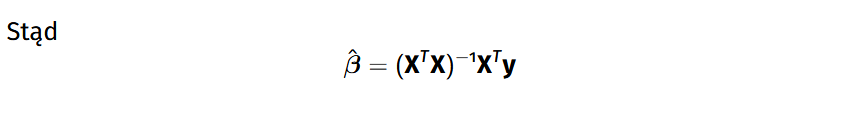

ważny element:

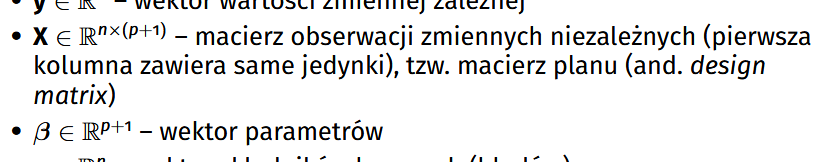

In [410]:
def ex1_ols(X, y):
    n = len(X)
    ones_column = np.ones((n, 1))
    Xmatrix = np.hstack((ones_column, X.reshape(-1, 1)))

    # Obliczamy (X^T X)
    XtX = Xmatrix.T @ Xmatrix

    # Obliczamy (X^T y)
    Xty = Xmatrix.T @ y

    # Obliczamy współczynniki beta_hat = (X^T X)^(-1) X^T y
    beta_hat = np.linalg.inv(XtX) @ Xty

    return beta_hat

beta_hat = ex1_ols(X, y)
print(f"Oszacowane współczynniki: beta_0 = {beta_hat[0]:.6f}, beta_1 = {beta_hat[1]:.6f}")
beta_hat

Oszacowane współczynniki: beta_0 = 3.019850, beta_1 = 3.596697


array([3.01984969, 3.59669741])

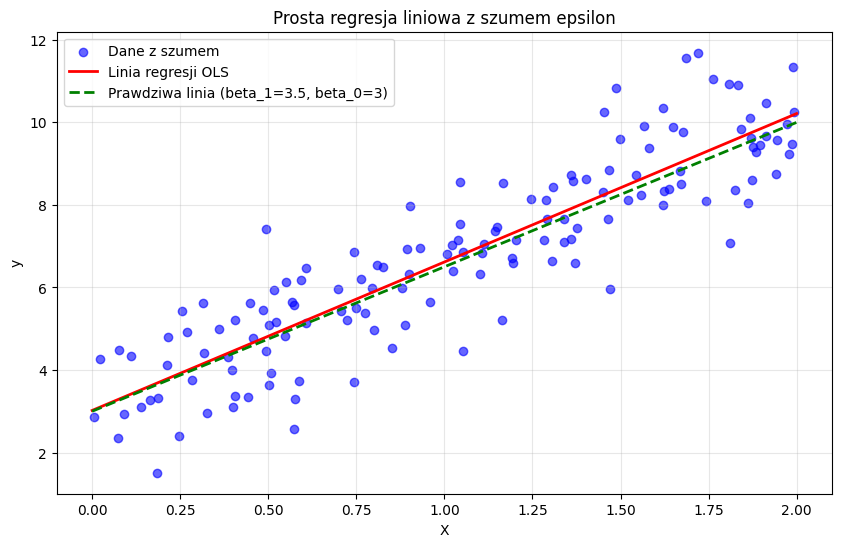

Rzeczywiste parametry: beta_0 = 3, beta_1 = 3.5
Oszacowane parametry: beta_0 = 3.0198, beta_1 = 3.5967


In [411]:
X_line = np.linspace(0, 2, 100).reshape(-1,1)
y_line = beta_hat[1] * X_line + beta_hat[0]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Dane z szumem')
plt.plot(X_line, beta_hat[1] * X_line + beta_hat[0], color='red', linewidth=2, label='Linia regresji OLS')
plt.plot(X_line, beta_1 * X_line + beta_0, color='green', linewidth=2, linestyle='--', label='Prawdziwa linia (beta_1=3.5, beta_0=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Prosta regresja liniowa z szumem epsilon')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Rzeczywiste parametry: beta_0 = {beta_0}, beta_1 = {beta_1}")
print(f"Oszacowane parametry: beta_0 = {beta_hat[0]:.4f}, beta_1 = {beta_hat[1]:.4f}")

## zad 2

Używam klasy `LinearRegression` z biblioteki `scikit-learn` do rozwiązania problemu z zadania 1. Porównuję uzyskane współczynniki z własną implementacją OLS. Następnie, używam publicznie dostępnego zbioru danych Boston Housing do zbudowania modelu regresji wielokrotnej.

In [412]:
sklearn_model = LinearRegression()
sklearn_model.fit(X.reshape(-1, 1), y)

print("Współczynniki z scikit-learn:")
print(f"Beta 0: {sklearn_model.intercept_:.6f}")
print(f"Beta 1: {sklearn_model.coef_[0]:.6f}")

print("=============")

print("Współczynniki z własnej implementacji OLS:")
print(f"Beta 0: {beta_hat[0]:.6f}")
print(f"Beta 1: {beta_hat[1]:.6f}")

print("=============")

print("Różnice:")
print(f"Intercept różnica: {abs(sklearn_model.intercept_ - beta_hat[0])}")
print(f"Slope różnica: {abs(sklearn_model.coef_[0] - beta_hat[1])}")


Współczynniki z scikit-learn:
Beta 0: 3.019850
Beta 1: 3.596697
Współczynniki z własnej implementacji OLS:
Beta 0: 3.019850
Beta 1: 3.596697
Różnice:
Intercept różnica: 6.217248937900877e-15
Slope różnica: 5.773159728050814e-15


Wrzucam to na wykres

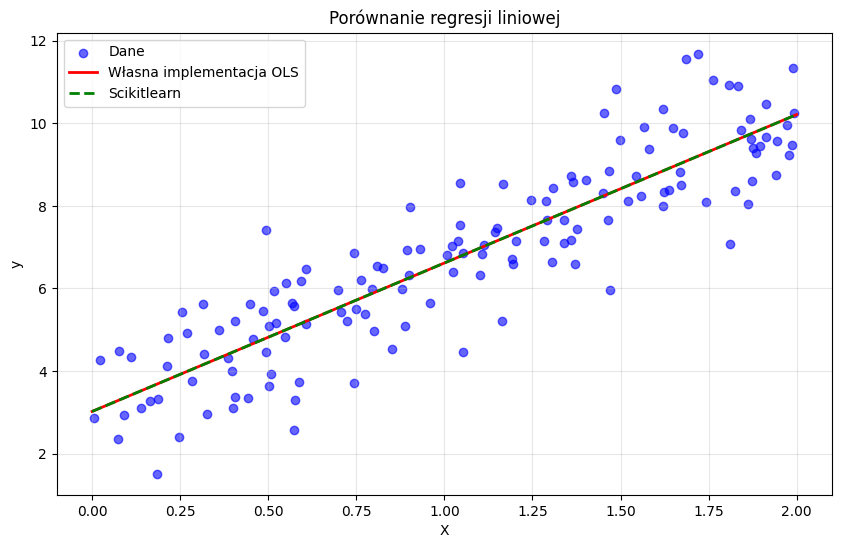

In [413]:
y_sklearn = sklearn_model.predict(X_line)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Dane')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Własna implementacja OLS')
plt.plot(X_line, y_sklearn, color='green', linewidth=2, linestyle='--', label='Scikitlearn')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Porównanie regresji liniowej')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Teraz test na większym datasecie

Używam zbioru danych Boston Housing do zbudowania modelu. Ten zbiór zawiera informacje o cenach domów w Bostonie oraz różne cechy, które mogą wpływać na cenę.

In [414]:
df_boston = pd.read_csv('./assets/HousingData.csv')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


To co widzimy, to:

| Column name | Description |
|--------------|-------------|
| CRIM | per capita crime rate by town |
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS | proportion of non-retail business acres per town |
| CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX | nitric oxides concentration (parts per 10 million) |
| RM | average number of rooms per dwelling |
| AGE | proportion of owner-occupied units built prior to 1940 |
| DIS | weighted distances to five Boston employment centers |
| RAD | index of accessibility to radial highways |
| TAX | full-value property-tax rate per $10,000 |
| PTRATIO | pupil-teacher ratio by town |
| B | 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town |
| LSTAT | % lower status of the population |
| MEDV | Median value of owner-occupied homes in $1000’s |


In [415]:
nan_count = df_boston.isna().any(axis=1).sum()
print(f"liczba brakujących wartości w kolumnach: {nan_count} na {df_boston.shape[0]} wierszy")

liczba brakujących wartości w kolumnach: 112 na 506 wierszy


In [416]:
df_boston.dropna(inplace=True)

In [417]:
X_boston = df_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y_boston = df_boston['MEDV']

In [418]:
boston_model = LinearRegression()
boston_model.fit(X_boston, y_boston)

LinearRegression()

Po wytrenowaniu modelu na zbiorze Boston Housing, otrzymuję współczynniki dla każdej z cech. Współczynniki wskazują, jak każda zmienna niezależna wpływa na cenę nieruchomości (MEDV). Współczynniki dodatnie oznaczają pozytywny wpływ na cenę, a ujemne - negatywny. Na przykład, jeśli współczynnik dla RM (średnia liczba pokoi) jest dodatni, oznacza to, że więcej pokoi wiąże się z wyższą ceną.


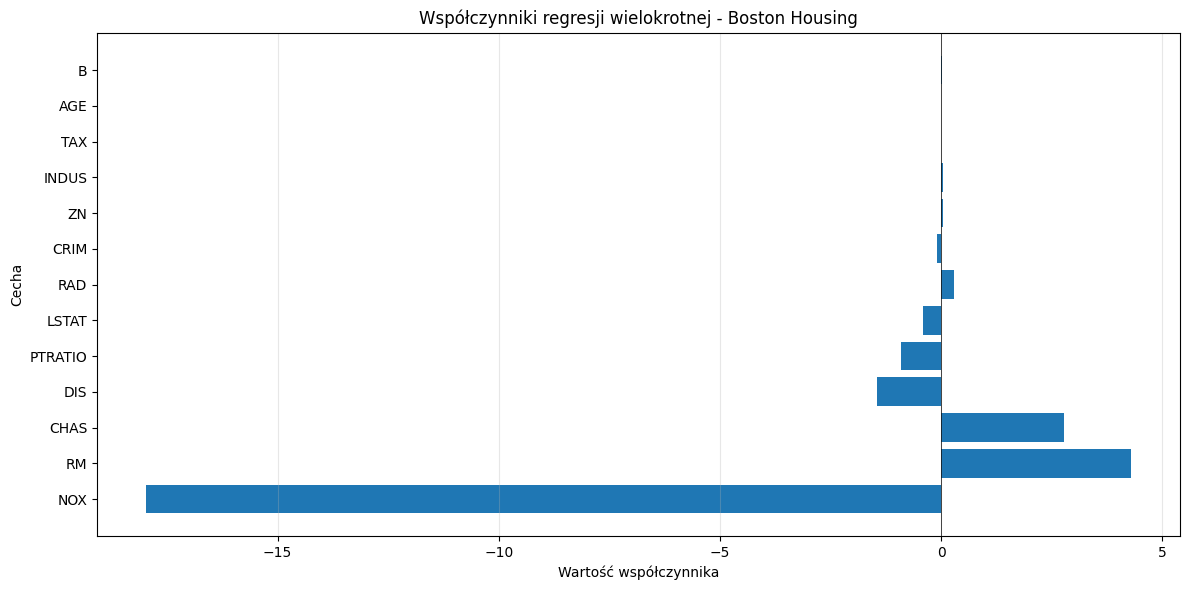


Największy wpływ dodatni: RM (4.2833)
Największy wpływ ujemny: NOX (-17.9690)


In [419]:
plt.figure(figsize=(12, 6))
coef_df = pd.DataFrame({
    'Feature': X_boston.columns,
    'Coefficient': boston_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Wartość współczynnika')
plt.ylabel('Cecha')
plt.title('Współczynniki regresji wielokrotnej - Boston Housing')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\nNajwiększy wpływ dodatni: {coef_df.loc[coef_df['Coefficient'].idxmax(), 'Feature']} ({coef_df['Coefficient'].max():.4f})")
print(f"Największy wpływ ujemny: {coef_df.loc[coef_df['Coefficient'].idxmin(), 'Feature']} ({coef_df['Coefficient'].min():.4f})")


In [420]:
y_pred_boston = boston_model.predict(X_boston)

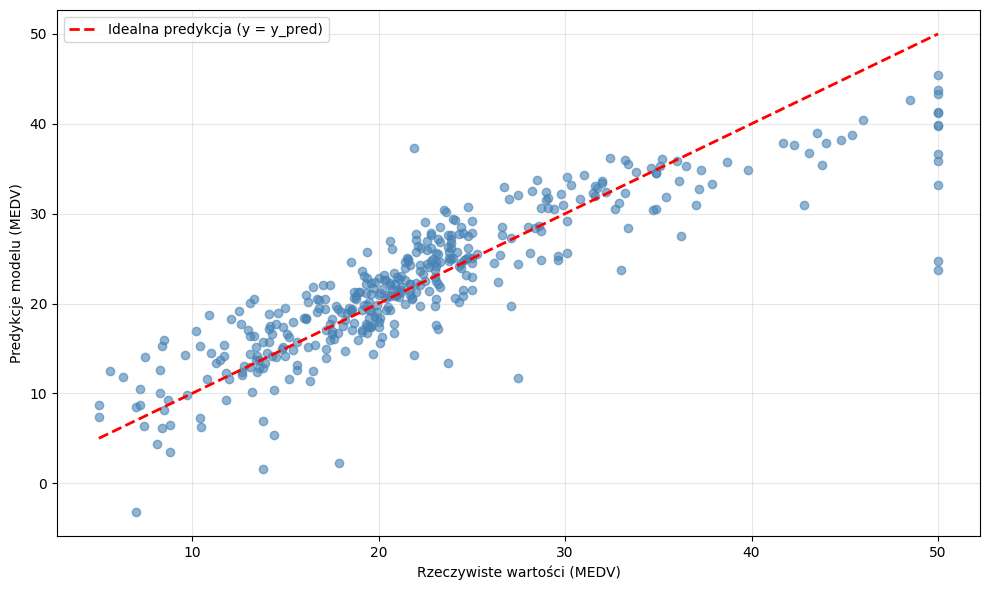


Interpretacja wykresu:
Punkty blisko czerwonej linii oznaczonej 'Idealna predykcja' wskazują, że model
dobrze przewiduje wartości. Odchylenia od tej linii to błędy predykcji.


In [421]:
plt.figure(figsize=(10, 6))
plt.scatter(y_boston, y_pred_boston, alpha=0.6, color='steelblue')
plt.plot([y_boston.min(), y_boston.max()], [y_boston.min(), y_boston.max()], 
         'r--', linewidth=2, label='Idealna predykcja (y = y_pred)')
plt.xlabel('Rzeczywiste wartości (MEDV)')
plt.ylabel('Predykcje modelu (MEDV)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretacja wykresu:")
print("Punkty blisko czerwonej linii oznaczonej 'Idealna predykcja' wskazują, że model")
print("dobrze przewiduje wartości. Odchylenia od tej linii to błędy predykcji.")

## zad 3

Obliczam i interpretuję podstawowe metryki oceny:

- **MSE (Mean Squared Error)** - średni błąd kwadratowy
- **RMSE (Root Mean Squared Error)** - pierwiastek średniego błędu kwadratowego  
- **MAE (Mean Absolute Error)** - średni błąd bezwzględny
- **R^2 (R-squared)** - współczynnik determinacji

Jak czytać te miary:
- **MSE/RMSE**: Im niższy, tym lepszy model
- **MAE**: średni błąd bezwzględny (bardziej odporny na wartości odstające niż MSE)
- **R^2**: przedział 0-1 (im wyższe tym lepsze)


Wzory  dla metryk:

**MSE**
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**RMSE**
$$
RMSE = \sqrt{MSE}
$$

**MAE**
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

**R^2:**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Gdzie:
- $y_i$ - rzeczywiste wartości
- $\hat{y}_i$ - predykcje modelu
- $\bar{y}$ - średnia z rzeczywistych wartości
- $n$ - liczba próbek


In [422]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }
    
    df = pd.DataFrame({
        'Metryka': ['MSE (Mean Squared Error)', 'RMSE (Root Mean Squared Error)', 'MAE (Mean Absolute Error)', 'R² (R-squared)'],
        'Wartość': [metrics['MSE'], metrics['RMSE'], metrics['MAE'], metrics['R²']]
    })
    df['Wartość'] = df['Wartość'].apply(lambda x: f'{x:.2f}')

    return df, metrics

Metryki dla prostego modelu pokazują, jak dobrze linia regresji dopasowała się do danych. MSE i RMSE pokazują średni kwadratowy błąd predykcji - im niższe, tym lepiej. MAE jest bardziej odporne na wartości odstające niż MSE. R² pokazuje, jaki procent wariancji zmiennej zależnej jest wyjaśniony przez model - wartość bliska 1 oznacza bardzo dobre dopasowanie.

In [423]:
y_pred_simple = beta_hat[1] * X + beta_hat[0]
metrics_simple_df, metrics_simple = calculate_metrics(y, y_pred_simple)
metrics_simple_df

,Metryka,Wartość
0,MSE (Mean Squared Error),1.09
1,RMSE (Root Mean Squared Error),1.05
2,MAE (Mean Absolute Error),0.83
3,R² (R-squared),0.80


Model Boston Housing działa na bardziej złożonych danych z wieloma cechami. RMSE w jednostkach zmiennej docelowej (tysiące dolarów) pokazuje średni błąd predykcji - jeśli RMSE wynosi np. 4.5, oznacza to, że średnio model myli się o około 4500 dolarów w przewidywaniu ceny nieruchomości. R² pokazuje, jak dobrze model wyjaśnia zmienność cen nieruchomości.


In [424]:
y_pred_boston = boston_model.predict(X_boston)
metrics_boston_df, metrics_boston = calculate_metrics(y_boston, y_pred_boston)
metrics_boston_df

,Metryka,Wartość
0,MSE (Mean Squared Error),19.42
1,RMSE (Root Mean Squared Error),4.41
2,MAE (Mean Absolute Error),3.06
3,R² (R-squared),0.77


Porównajmy sobie

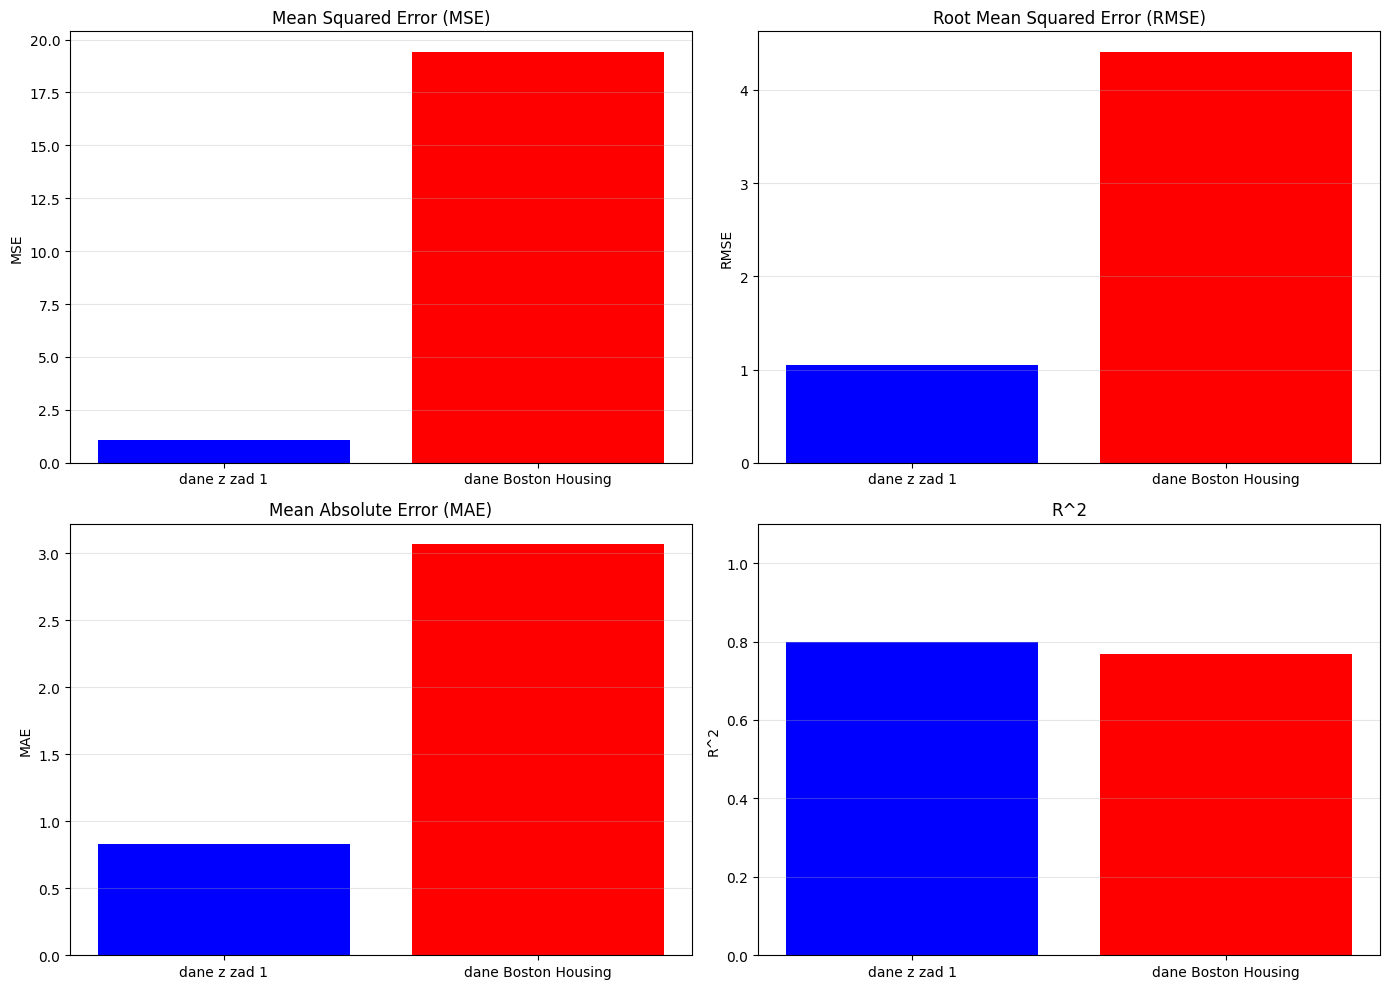

In [425]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MSE
axes[0, 0].bar(['dane z zad 1', 'dane Boston Housing'], [metrics_simple['MSE'], metrics_boston['MSE']], color=['blue', 'red'])
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# RMSE
axes[0, 1].bar(['dane z zad 1', 'dane Boston Housing'], [metrics_simple['RMSE'], metrics_boston['RMSE']], color=['blue', 'red'])
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# MAE
axes[1, 0].bar(['dane z zad 1', 'dane Boston Housing'], [metrics_simple['MAE'], metrics_boston['MAE']], color=['blue', 'red'])
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# R^2
axes[1, 1].bar(['dane z zad 1', 'dane Boston Housing'], [metrics_simple['R²'], metrics_boston['R²']], color=['blue', 'red'])
axes[1, 1].set_ylabel('R^2')
axes[1, 1].set_title('R^2')
axes[1, 1].set_ylim([0, 1.1])
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Porównanie obu modeli pokazuje, że model prosty osiąga lepsze wyniki w zakresie wszystkich metryk (niższe MSE, RMSE, MAE oraz wyższe R^2), co jest zgodne z oczekiwaniami: prosty model regresji liniowej łatwiej dopasowuje się do danych syntetycznych z jedną zmienną, podczas gdy model Boston Housing musi radzić sobie z wieloma zmiennymi i bardziej złożonymi zależnościami w rzeczywistych danych.

## zad 4

Regularyzacja to technika zapobiegania przeuczeniu. Dwie najpopularniejsze metody to **Ridge** (regresja grzbietowa) i **Lasso**.
- **Regresja Ridge (L2):** zmniejsza współczynniki, ale nie eliminuje ich całkowicie.
- **Regresja Lasso (L1):** może całkowicie eliminować mało ważne cechy (ustawia współczynniki na zero).

Spójrzmy na przedstawienie tych metod z wykładu:

### Ridge

<center>
    <img src="./screens/l3-ridge.png" style="width: 45%; margin-right: 5%;">
    <img src="./screens/l3-ridge-p2.png" style="width: 45%;">
</center>

### Lasso

<center>
    <img src="./screens/l3-lasso.png" style="width: 45%; margin-right: 5%;">
    <img src="./screens/l3-lasso-p2.png" style="width: 45%;">
</center>

### Implementacja

Wprowadzam większy szum do danych z zadania 1 i buduję modele: LinearRegression, Ridge i Lasso, żeby porównać jak regularyzacja wpływa na współczynniki.

In [426]:
np.random.seed(random_state)
n = 143
X_reg = 2 * np.random.rand(n)

beta_1 = 3.5
beta_0 = 3
sigma_high = 5 # odchylenie standardowe większe niż w zad 1

epsilon_high = np.random.normal(0, sigma_high, n)
y_reg = beta_1 * X_reg + beta_0 + epsilon_high

Wybieram również wartości alfa, korzystając z podpowiedzi na wykładzie

<center>
    <img src="./screens/l3-alpha.png" style="width: 60%; margin-right: 5%;">
</center>

In [427]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.8)
lasso_model = Lasso(alpha=0.3)

linear_model.fit(X_reg.reshape(-1, 1), y_reg)
ridge_model.fit(X_reg.reshape(-1, 1), y_reg)
lasso_model.fit(X_reg.reshape(-1, 1), y_reg)

Lasso(alpha=0.3)

In [428]:
comparison_df = pd.DataFrame({
    'model': ['linear', 'ridge', 'lasso', 'prawdziwe wartości'],
    'beta_0': [
        linear_model.intercept_,
        ridge_model.intercept_,
        lasso_model.intercept_,
        beta_0
    ],
    'beta_1': [
        linear_model.coef_[0],
        ridge_model.coef_[0],
        lasso_model.coef_[0],
        beta_1
    ]
})

comparison_df['beta_0'] = comparison_df['beta_0'].apply(lambda x: f'{x:.2f}')
comparison_df['beta_1'] = comparison_df['beta_1'].apply(lambda x: f'{x:.2f}')
comparison_df

,model,beta_0,beta_1
0,linear,3.10,3.98
1,ridge,3.17,3.92
2,lasso,4.04,3.08
3,prawdziwe wartości,3.00,3.50


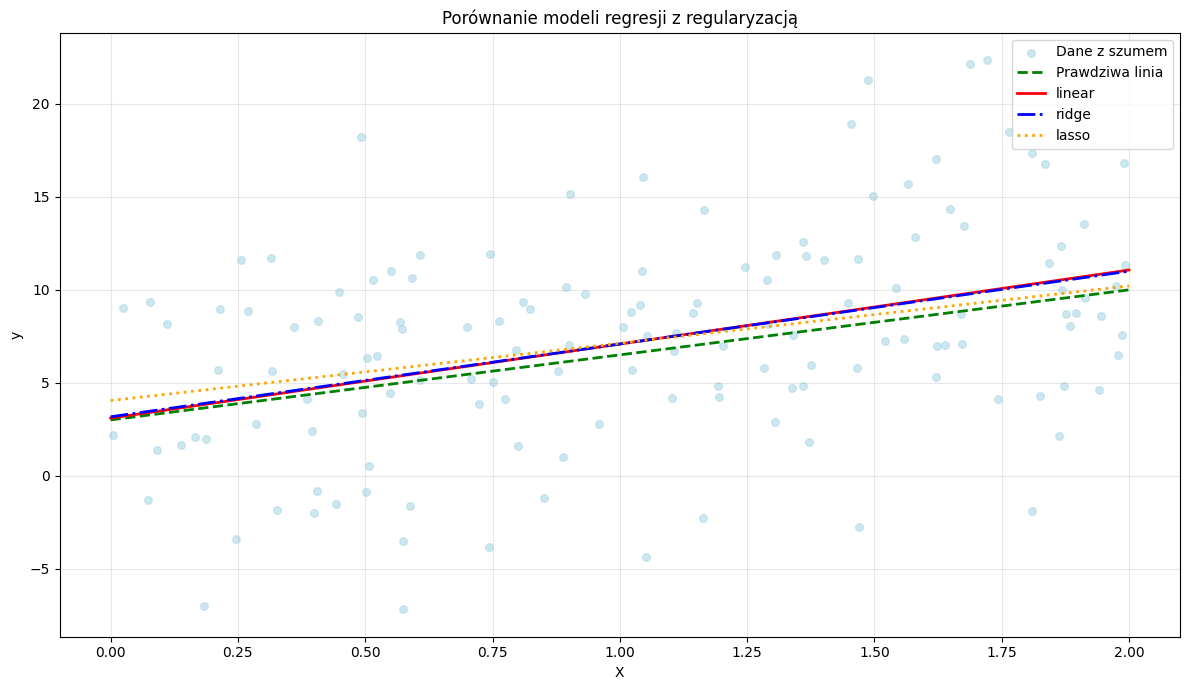

In [429]:
X_line = np.linspace(0, 2, 100).reshape(-1, 1)

y_linear_line = linear_model.predict(X_line)
y_ridge_line = ridge_model.predict(X_line)
y_lasso_line = lasso_model.predict(X_line)
y_true = beta_1 * X_line.flatten() + beta_0

y_linear = linear_model.predict(X_reg.reshape(-1, 1))
y_ridge = ridge_model.predict(X_reg.reshape(-1, 1))
y_lasso = lasso_model.predict(X_reg.reshape(-1, 1))

plt.figure(figsize=(12, 7))
plt.scatter(X_reg, y_reg, color='lightblue', alpha=0.6, label='Dane z szumem', s=30)
plt.plot(X_line, y_true, color='green', linewidth=2, linestyle='--', label=f'Prawdziwa linia')
plt.plot(X_line, y_linear_line, color='red', linewidth=2, label='linear')
plt.plot(X_line, y_ridge_line, color='blue', linewidth=2, linestyle='-.', label='ridge')
plt.plot(X_line, y_lasso_line, color='orange', linewidth=2, linestyle=':', label='lasso')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Porównanie modeli regresji z regularyzacją')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [430]:
lin_metrics_df, _ = calculate_metrics(y_reg, y_linear)
ridge_metrics_df, _ = calculate_metrics(y_reg, y_ridge)
lasso_metrics_df, _ = calculate_metrics(y_reg, y_lasso)

lin_metrics_df

,Metryka,Wartość
0,MSE (Mean Squared Error),27.34
1,RMSE (Root Mean Squared Error),5.23
2,MAE (Mean Absolute Error),4.16
3,R² (R-squared),0.16


In [431]:
ridge_metrics_df

,Metryka,Wartość
0,MSE (Mean Squared Error),27.34
1,RMSE (Root Mean Squared Error),5.23
2,MAE (Mean Absolute Error),4.16
3,R² (R-squared),0.16


In [432]:
lasso_metrics_df

,Metryka,Wartość
0,MSE (Mean Squared Error),27.61
1,RMSE (Root Mean Squared Error),5.25
2,MAE (Mean Absolute Error),4.14
3,R² (R-squared),0.15


Porównując współczynniki trzech modeli:

- **Linear Regression**: stara się dokładnie dopasować do danych, co może prowadzić do wysokich wartości współczynników przy większym szumie.
- **Ridge**: zmniejsza współczynniki, ale nie eliminuje ich. Pomaga w uogólnianiu modelu.
- **Lasso**: może całkowicie eliminować mało ważne cechy (ustawia współczynniki na zero). W przypadku jednej zmiennej również zmniejsza wartość współczynnika.

Parametr **alpha** kontroluje siłę regularyzacji - im większe, tym silniejsza regularyzacja. Spójrzmy jeszcze na podsumowanie z wykładu:

<center>
<img src="./screens/l3-lasso-vs-ridge.png" style="width: 80%;">
</center>

## zad 5

Regresja logistyczna służy do klasyfikacji binarnej. Kluczowym elementem jest **funkcja sigmoidalna**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Gdzie $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$.

Funkcja sigmoidalna przekształca dowolną wartość rzeczywistą na zakres (0, 1), co czyni ją idealną do modelowania prawdopodobieństwa.


In [433]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# przykład użycia
z_values = np.array([-5, -2, 0, 2, 5])
sigmoid_values = sigmoid(z_values)

for z, sig in zip(z_values, sigmoid_values):
    print(f"σ({z:4.1f}) = {sig:.6f}")

σ(-5.0) = 0.006693
σ(-2.0) = 0.119203
σ( 0.0) = 0.500000
σ( 2.0) = 0.880797
σ( 5.0) = 0.993307


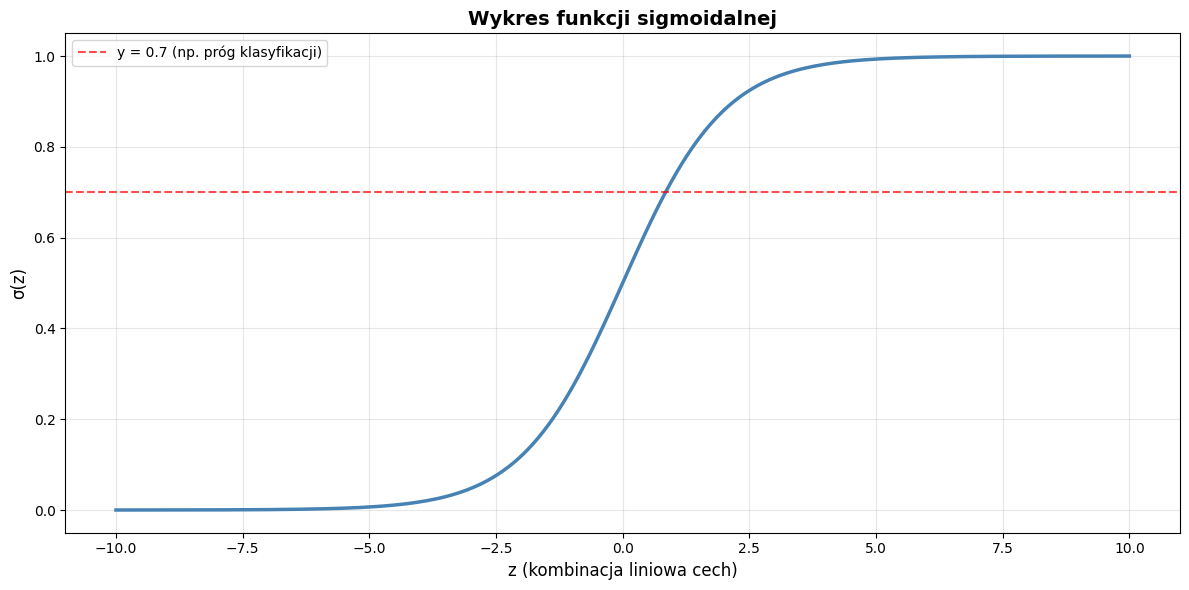

In [434]:
z_range = np.linspace(-10, 10, 200)
sigma_values = sigmoid(z_range)

plt.figure(figsize=(12, 6))
plt.plot(z_range, sigma_values, linewidth=2.5, color='steelblue')
plt.axhline(y=0.7, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='y = 0.7 (np. próg klasyfikacji)')
plt.xlabel('z (kombinacja liniowa cech)', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Wykres funkcji sigmoidalnej', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.ylim([-0.05, 1.05])
plt.tight_layout()
plt.show()

Dlaczego funkcja sigmoidalna jest używana w klasyfikacji binarnej:
1. Przekształca dowolną wartość na zakres $(0, 1)$, co naturalnie odpowiada prawdopodobieństwu
2. Jest monotoniczna rosnąca, większe z oznacza większe prawdopodobieństwo klasy pozytywnej
3. Zapewnia płynne przejście między klasami


## zad 6

Używam zbioru danych **Breast Cancer** z scikit-learn do zbudowania modelu regresji logistycznej. Celem jest klasyfikacja guzów na złośliwe (malignant) lub łagodne (benign).


In [435]:
breast_cancer = load_breast_cancer()
X_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y_cancer = pd.Series(breast_cancer.target)

print(f"liczba próbek: {X_cancer.shape[0]}")
print(f"klasa 0 (łagodny): {(y_cancer == 0).sum()} próbek")
print(f"klasa 1 (złośliwy): {(y_cancer == 1).sum()} próbek")
X_cancer.head()


liczba próbek: 569
klasa 0 (łagodny): 212 próbek
klasa 1 (złośliwy): 357 próbek


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [436]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer,
    test_size=0.15,
    random_state=random_state,
    stratify=y_cancer
)

print(f"zbiór treningowy: {X_train.shape[0]} próbek")
print(f"zbiór testowy: {X_test.shape[0]} próbek")

zbiór treningowy: 483 próbek
zbiór testowy: 86 próbek


Skaluje dane

In [437]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [438]:
logistic_model = LogisticRegression(random_state=random_state)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

Model został wytrenowany i dokonał predykcji. `predict` zwraca etykiety klas (0 lub 1), a `predict_proba` daje prawdopodobieństwa z zakresu [0, 1].


## zad 7

Obliczam metryki oceny modelu klasyfikacji:

- **dokładność**: Proporcja poprawnie sklasyfikowanych próbek
- **precyzja**: Proporcja prawdziwie pozytywnych predykcji do wszystkich pozytywnych predykcji
- **czułość**: Proporcja prawdziwie pozytywnych predykcji do wszystkich rzeczywistych pozytywnych próbek
- **macierz pomyłek**: Tabela pokazująca liczbę poprawnych i błędnych predykcji dla każdej klasy


In [439]:
def calculate_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }
    
    df = pd.DataFrame({
        'Metryka': ['Accuracy (Dokładność)', 'Precision (Precyzja)', 'Recall (Czułość)'],
        'Wartość': [metrics['Accuracy'], metrics['Precision'], metrics['Recall']]
    })
    df['Wartość'] = df['Wartość'].apply(lambda x: f'{x:.2f}')
    
    return df, metrics, cm

metrics_df, metrics_dict, confusion_mat = calculate_classification_metrics(y_test, y_pred)
metrics_df

,Metryka,Wartość
0,Accuracy (Dokładność),0.99
1,Precision (Precyzja),0.98
2,Recall (Czułość),1.00


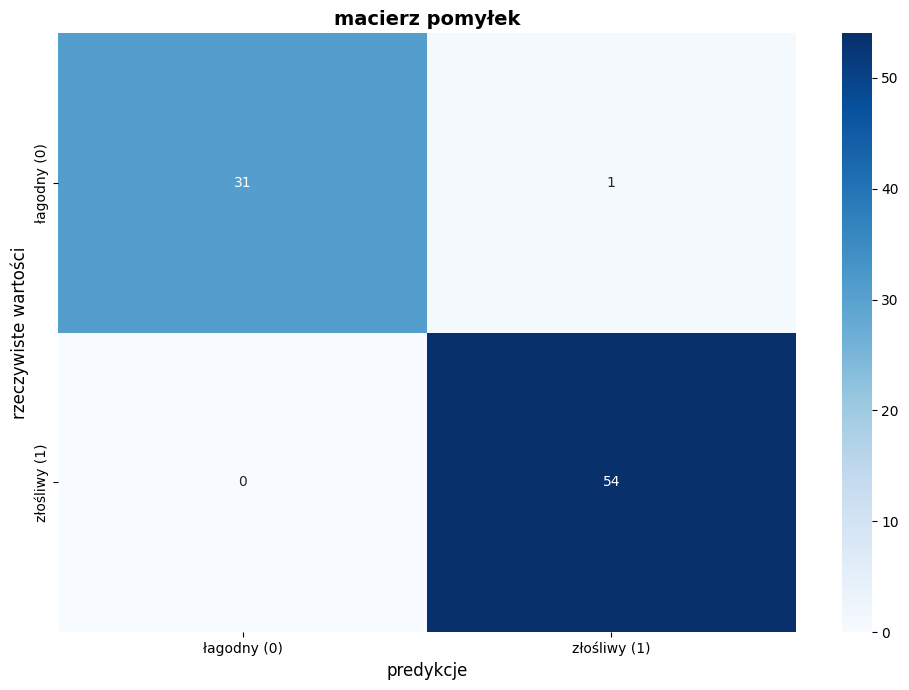

In [440]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['łagodny (0)', 'złośliwy (1)'], yticklabels=['łagodny (0)', 'złośliwy (1)'])
plt.ylabel('rzeczywiste wartości', fontsize=12)
plt.xlabel('predykcje', fontsize=12)
plt.title('macierz pomyłek', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()